# Porównanie struktur QuadTree i KdTree

In [1]:
import quad_tree
import quad_tree_vis
import kd_tree
import kd_tree_visualiser
from Point import Point
from Rectangle import Rectangle
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import tests.generate_tests as gt
from visualizer_bit.main import Visualizer
import tests.generate_tests as gt
import quad_tree_test as quad_tests
import kd_tree_test as kd_tests

## Testy poprawności implementacji:

In [2]:
print("Test poprawności QuadTree")
quad_tests.start_generate_test()
print("Test poprawności KdTree")
kd_tests.start_generate_test()

Test poprawności QuadTree
----------------------------------------------------
Uruchamianie: run_circle_test
Zaliczone: run_circle_test
----------------------------------------------------
Uruchamianie: run_on_line_test
Zaliczone: run_on_line_test
----------------------------------------------------
Uruchamianie: run_grid_normal_test
Zaliczone: run_grid_normal_test
----------------------------------------------------
Uruchamianie: run_cross_on_axes_test
Zaliczone: run_cross_on_axes_test
----------------------------------------------------
Uruchamianie: run_uniform_distribution_test
Zaliczone: run_uniform_distribution_test
----------------------------------------------------
Uruchamianie: run_clasters_test
Zaliczone: run_clasters_test
----------------------------------------------------
Uruchamianie: run_random_points_on_rectangle_test
Zaliczone: run_random_points_on_rectangle_test
----------------------------------------------------
Uruchamianie: run_standard_distribution_test
Zaliczon

## Porównanie wydajnościowe struktur QuadTree i KdTree

In [2]:
# Zwiększ szerokość wyświetlanych kolumn
pd.set_option('display.max_columns', None)  # Zwiększa liczbę wyświetlanych kolumn
pd.set_option('display.width', 1000)

Funkcje pomocnicze

In [3]:
import copy
def measure_time(function, *args, **kwargs):
    """Pomocnicza funkcja do mierzenia czasu wykonania."""
    start = time()
    result = function(*args, **kwargs)
    end = time()
    return result, end - start

def show_time_table(test_set, rectangle = Rectangle(Point((30,30)), Point((70,70))), output_file=None, title="Benchmark"):
    """
    Wyświetla tabelę z czasami budowy i wyszukiwania dla KDTree i QuadTree,
    z opcją zapisu do pliku CSV.
    
    Args:
        test_set (list): Lista zbiorów testowych.
        rectangle: Prostokąt do wyszukiwania.
        output_file (str, optional): Ścieżka do pliku CSV, gdzie tabela zostanie zapisana.
        title (str): Tytuł tabeli.
    """
    build_times = []
    search_times = []
    sizes = []
    finded = []

    for zbior_test in test_set:
        liczba_punktow = len(zbior_test)
        sizes.append(liczba_punktow)

        # Mierzenie czasu dla KDTree
        kdtree, build_kd_time = measure_time(kd_tree.KdTree, zbior_test, len(zbior_test[0]))
        _, search_kd_time = measure_time(kdtree.find_points_in_region, rectangle)

        # Mierzenie czasu dla QuadTree
        Q_tree, build_qt_time = measure_time(quad_tree.build_quadtree, zbior_test)
        cos, search_qt_time = measure_time(Q_tree.search, rectangle, [])

        # Dodanie wyników
        finded.append(len(cos))
        build_times.append([build_kd_time, build_qt_time])
        search_times.append([search_kd_time, search_qt_time])

    # Tworzenie DataFrame z zamienionymi kolumnami
    df = pd.DataFrame(
        data={
            "Liczba punktów": sizes,
            "Liczba znalezionych": finded,
            "KDTree Build [s]": [bt[0] for bt in build_times],
            "QuadTree Build [s]": [bt[1] for bt in build_times],  
            "KDTree Search [s]": [st[0] for st in search_times],  
            "QuadTree Search [s]": [st[1] for st in search_times],
        }
    )

    # Wyświetlanie tytułu i tabeli
    print(f"\n{title}")
    print(df)

    # Zapis do pliku CSV, jeśli podano ścieżkę
    if output_file:
        df.to_csv(output_file, index=False)
        # print(f"\nTabela została zapisana do pliku: {output_file}")
    return df


In [4]:
import matplotlib.pyplot as plt

def show_graphs(df, title):
    # Tworzenie wykresów w jednym rzędzie, dwóch kolumnach
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3.5))
    
    # Tytuł całkowity wykresu
    fig.suptitle(title)
    
    # Pierwszy wykres: Czas konstrukcji
    ax1.set_title("Czas konstrukcji")
    ax1.plot(df["Liczba punktów"], df["KDTree Build [s]"], label="KDTree", marker="o")
    ax1.plot(df["Liczba punktów"], df["QuadTree Build [s]"], label="QuadTree", marker="o")
    ax1.set_xlabel("Liczba punktów")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.legend()
    
    # Drugi wykres: Czas przeszukiwania
    ax2.set_title("Czas przeszukiwania")
    ax2.plot(df["Liczba punktów"], df["KDTree Search [s]"], label="KDTree", marker="o")
    ax2.plot(df["Liczba punktów"], df["QuadTree Search [s]"], label="QuadTree", marker="o")
    ax2.set_xlabel("Liczba punktów")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.legend()
    
    # Wyświetlanie wykresu
    plt.show()

1. Rozkład jednostajny


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000                 1584          0.099704            0.113114           0.001207             0.002624
1           20000                 3153          0.197134            0.248309           0.002122             0.006085
2           30000                 4878          0.842558            0.604996           0.002652             0.008536
3           40000                 6376          0.984656            0.800271           0.003389             0.011235
4           50000                 8122          1.231963            1.013647           0.004022             0.013456
5           60000                 9698          1.503397            1.208796           0.004818             0.016875
6           70000                11109          2.224185            1.455102           0.005178             0.020226
7           80000                12799          2.079

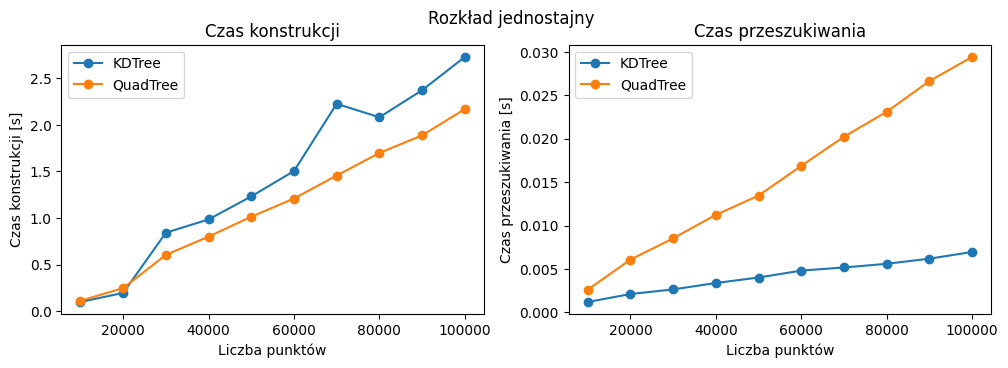

In [25]:
df1 = show_time_table([gt.generate_uniform_distribution(10000*n,0,100,0,100) for n in range(1,11)],output_file="c1.csv")
show_graphs(df1, "Rozkład jednostajny")

2. Rozkład normalny


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000                 9065          0.126911            0.128653           0.003444             0.013705
1           20000                18265          0.274947            0.436745           0.006107             0.032683
2           30000                27325          1.058694            0.666784           0.008463             0.045330
3           40000                36565          1.190508            0.904319           0.010741             0.071479
4           50000                45502          1.510528            1.147121           0.012888             0.079209
5           60000                54761          1.812845            1.383380           0.016062             0.096482
6           70000                63749          2.681743            1.644197           0.020454             0.109684
7           80000                72821          2.515

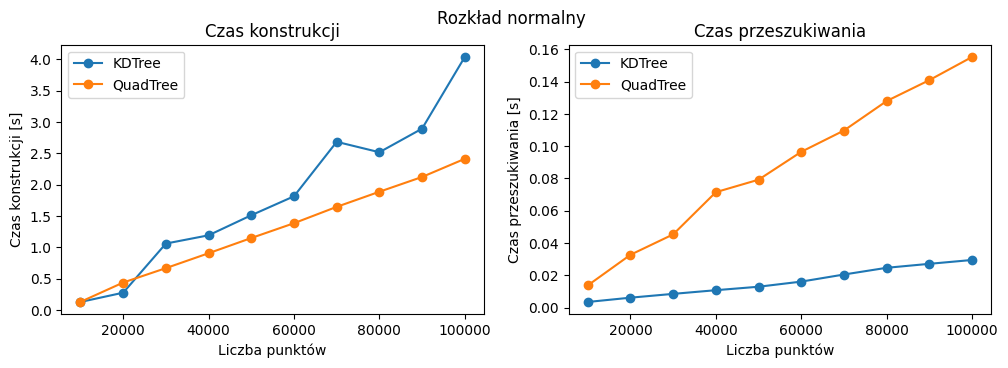

In [24]:
df2 = show_time_table([gt.generate_standard_distribution(10000*n,50,50,10,10) for n in range(1,11)],output_file="c2.csv")
show_graphs(df2, "Rozkład normalny")

3.1 Dwa skupiska


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000                 1282          0.139806            0.139009           0.000801             0.002233
1           20000                 2509          0.274324            0.432783           0.001220             0.004470
2           30000                 3726          0.924862            0.654897           0.001414             0.006137
3           40000                 4983          1.083023            1.172752           0.002090             0.008316
4           50000                 6211          1.424056            1.122201           0.001957             0.010307
5           60000                 7385          1.741453            1.333213           0.002489             0.012061
6           70000                 8498          2.012016            1.579657           0.002847             0.013862
7           80000                10055          2.357

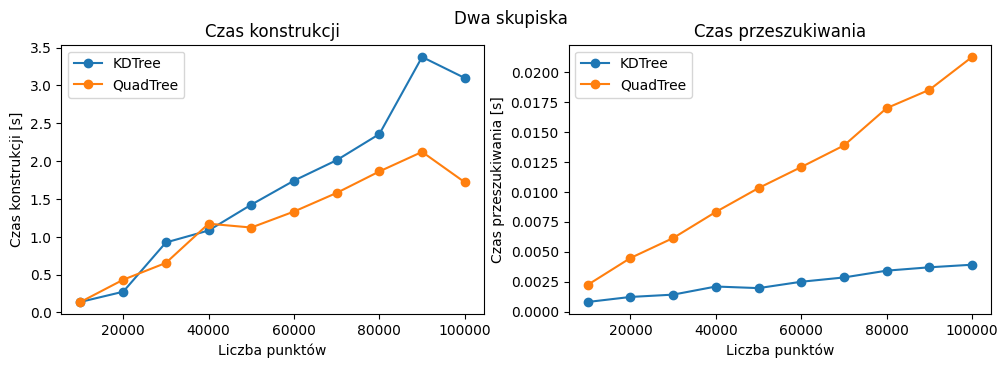

In [6]:
df31 = show_time_table([gt.generate_clasters(10000*n,2,0,100,0,100) for n in range(1,11)],Rectangle(Point((0,-70)),Point((100,100))),output_file="c31.csv")
show_graphs(df31, "Dwa skupiska")

3.2 Trzy skupiska


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000                  786          0.116105            0.122838           0.000490             0.001292
1           20000                 1720          0.243335            0.258774           0.000966             0.003364
2           30000                 2450          0.974821            0.397287           0.001031             0.004262
3           40000                 3305          1.284612            0.843121           0.001470             0.005934
4           50000                 4142          1.362533            1.045031           0.001465             0.007125
5           60000                 5002          1.666427            1.750906           0.002042             0.008565
6           70000                 5858          2.010580            1.518722           0.002356             0.009960
7           80000                 6699          2.347

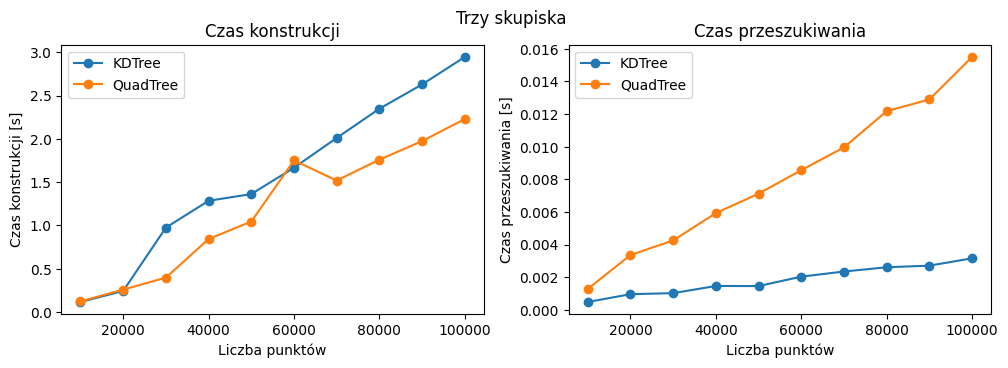

In [21]:
df32=show_time_table([gt.generate_clasters(10000*n,3,0,100,0,100) for n in range(1,11)],Rectangle(Point((0,-70)),Point((100,100))),output_file="c32.csv")
show_graphs(df32, "Trzy skupiska")

3.3 Dwa skupiska z wartościami odstającymi


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10050                 1207          0.226664            0.212153           0.000645             0.002097
1           20050                 2564          0.692866            0.289294           0.001158             0.004302
2           30050                 3687          0.994029            0.750741           0.001546             0.006173
3           40050                 4924          1.134024            0.906602           0.001956             0.008156
4           50050                 6361          1.718940            1.218973           0.002487             0.010045
5           60050                 7467          1.750854            1.479404           0.002661             0.012042
6           70050                 8737          2.090956            1.756417           0.002724             0.014634
7           80050                10113          2.354

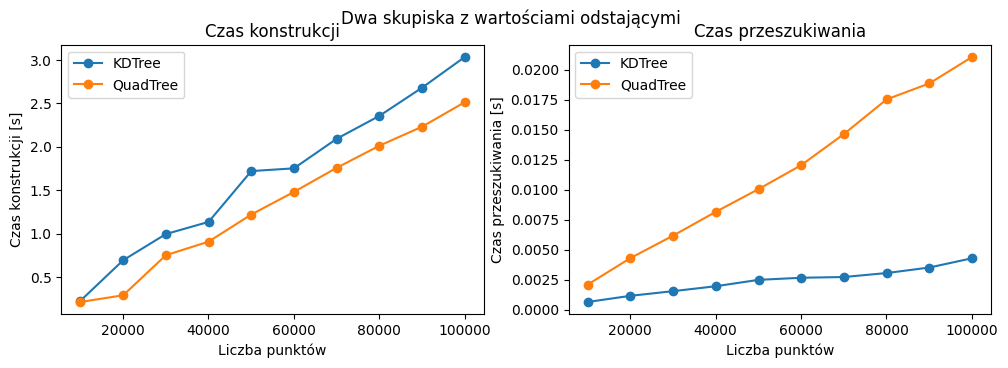

In [7]:
df33=show_time_table([gt.add_outliners(50, gt.generate_clasters(10000*n,2,0,100,0,100),0,100,0,100) for n in range(1,11)],Rectangle(Point((0,-70)),Point((100,100))),output_file="c33.csv")
show_graphs(df33, "Dwa skupiska z wartościami odstającymi")

3.4 Dwa skupiska z pustym polem wyszukiwań


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000                    0          0.206411            0.199044           0.000064             0.000040
1           20000                    1          0.569171            0.411495           0.000087             0.000038
2           30000                    3          0.761078            0.853157           0.000110             0.000036
3           40000                    0          1.084945            0.868330           0.000107             0.000048
4           50000                    5          1.409351            1.094378           0.000122             0.000057
5           60000                    0          1.690598            1.746583           0.000110             0.000058
6           70000                    3          2.037005            1.630593           0.000111             0.000082
7           80000                    2          2.292

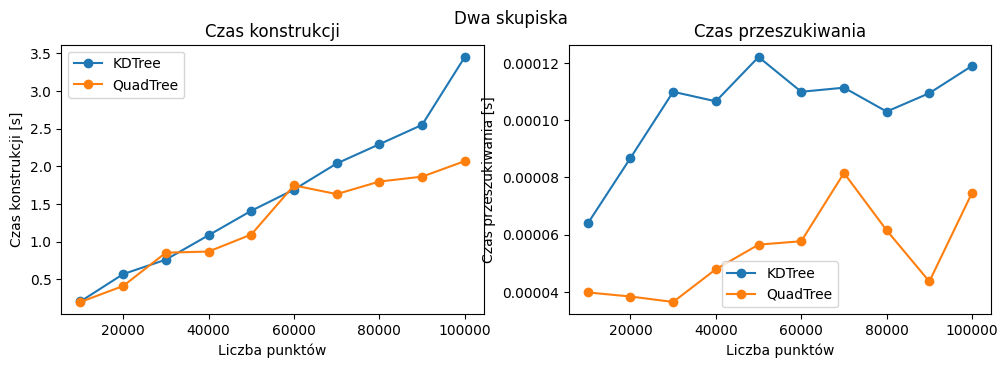

In [6]:
df34 = show_time_table([gt.generate_clasters(10000*n,2,0,100,0,100) for n in range(1,11)],output_file="c34.csv")
show_graphs(df34, "Dwa skupiska")

4. Rozkład w kształcie okręgu


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000                 4194          0.119930            0.110419           0.001067             0.005368
1           20000                 8562          0.250988            0.386046           0.002122             0.013633
2           30000                12844          0.756358            0.575046           0.002965             0.019411
3           40000                16840          1.048753            1.084768           0.004141             0.025713
4           50000                21196          1.372868            1.001379           0.005100             0.033205
5           60000                25624          1.664771            1.192260           0.005746             0.040878
6           70000                29795          1.932470            1.462246           0.007197             0.050722
7           80000                34058          2.871

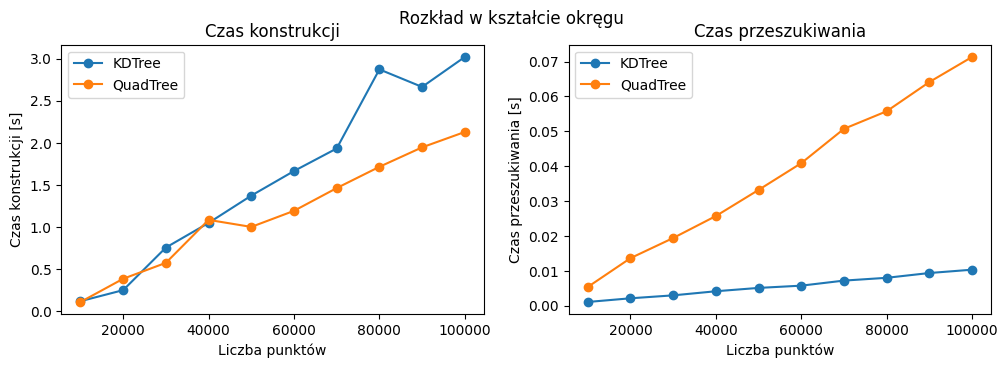

In [9]:
df4 = show_time_table([gt.generate_random_on_circle(10000*n,70,90) for n in range(1,11)],Rectangle(Point((0,-70)),Point((100,100))),output_file="c4.csv")
show_graphs(df4, "Rozkład w kształcie okręgu")

5. Rozkład krzyżowy


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000                 1269          0.094904            0.147987           0.002317             0.001807
1           20000                 2546          0.201364            0.297642           0.006216             0.004956
2           30000                 3751          0.838063            0.758615           0.008087             0.006836
3           40000                 5108          0.947130            0.913602           0.011613             0.009794
4           50000                 6322          1.593249            1.354899           0.014424             0.012239
5           60000                 7576          1.553099            1.623156           0.016856             0.014270
6           70000                 8874          1.832389            1.697993           0.020436             0.017029
7           80000                 9906          2.110

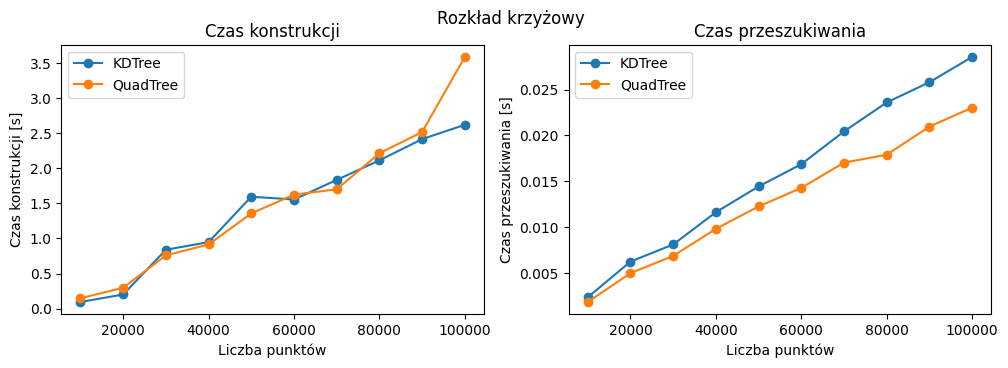

In [11]:
df5 = show_time_table([gt.generate_cross_on_axes(10000*n,-100,100,-100,100) for n in range(1,11)],Rectangle(Point((10,-20)),Point((60,30))),output_file="c5.csv")
show_graphs(df5, "Rozkład krzyżowy")

6. Rozkład na obwodzie prostokąta


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000                 1281          0.131241            0.161208           0.004341             0.002154
1           20000                 2582          0.264491            0.360843           0.009001             0.005404
2           30000                 3871          0.987131            0.795216           0.012527             0.007665
3           40000                 4964          1.071669            1.011281           0.012678             0.009852
4           50000                 6336          1.373684            1.302946           0.016487             0.012453
5           60000                 7569          1.662634            2.150496           0.025895             0.014567
6           70000                 8666          2.028926            2.039612           0.032017             0.016214
7           80000                 9878          2.321

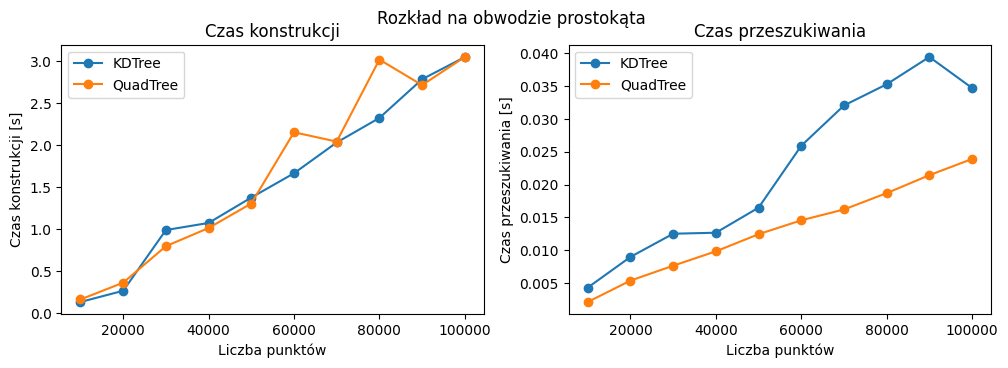

In [15]:
df6 = show_time_table([gt.generate_random_points_on_rectangle(10000*n,0,100,0,100) for n in range(1,11)],Rectangle(Point((10,-20)),Point((60,30))),output_file="c6.csv")
show_graphs(df6, "Rozkład na obwodzie prostokąta")

7. Rozkład wzdłuż lini


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000                 4989          0.094433            0.128793           0.002558             0.007323
1           20000                 9906          0.194262            0.281690           0.004073             0.016145
2           30000                14958          0.857642            0.640668           0.005490             0.023091
3           40000                20017          0.962514            0.868059           0.007541             0.032402
4           50000                24824          1.622779            0.769613           0.008189             0.042353
5           60000                30043          1.901304            1.358578           0.009890             0.051271
6           70000                35092          1.831655            1.646759           0.012056             0.060503
7           80000                39853          2.107

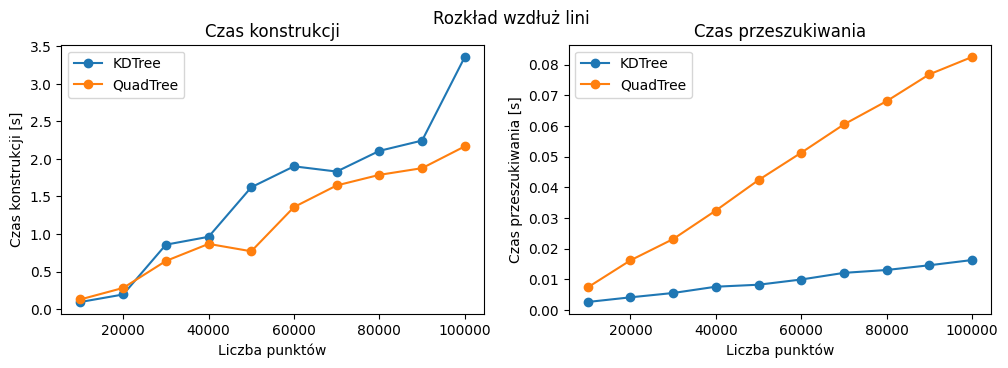

In [20]:
df7 = show_time_table([gt.generate_random_on_line(10000*n,1,10,0,100,10) for n in range(1,11)],Rectangle(Point((10,10)),Point((60,100))),output_file="c7.csv")
show_graphs(df7, "Rozkład wzdłuż lini")

8. Rozkład "Siatka"


Benchmark
   Liczba punktów  Liczba znalezionych  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000                 1600          0.076826            0.095832           0.001193             0.002149
1           20164                 3136          0.272905            0.358710           0.001803             0.003943
2           30276                 4900          0.631794            0.522469           0.001624             0.005258
3           40000                 6400          0.834820            0.675911           0.002335             0.007395
4           50176                 8100          1.360516            0.871633           0.002494             0.008946
5           60025                 9409          1.274107            1.044307           0.002881             0.010783
6           70225                11025          1.478235            1.239223           0.003337             0.012882
7           80089                12769          1.686

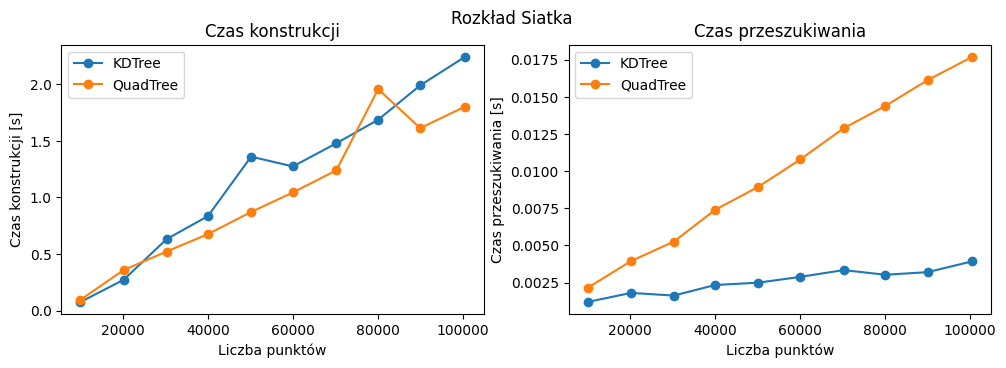

In [19]:
import math
df8 = show_time_table([gt.generate_grid_normal(math.ceil(100*  math.sqrt(n)),0,1000,0,1000) for n in range(1,11)],Rectangle(Point((300,300)), Point((700,700))),output_file="c8.csv")
show_graphs(df8, "Rozkład Siatka")

## Testy wyspecyfikowane testy wydajnościowe 

przeszukiwanie w k wymiarach

In [5]:
def show_time_table_k(test_set, output_file=None, title="Benchmark"):
    """
    Wyświetla tabelę z czasami budowy i wyszukiwania dla KDTree i QuadTree,
    z opcją zapisu do pliku CSV.
    
    Args:
        test_set (list): Lista zbiorów testowych.
        rectangle: Prostokąt do wyszukiwania.
        output_file (str, optional): Ścieżka do pliku CSV, gdzie tabela zostanie zapisana.
        title (str): Tytuł tabeli.
    """
    build_times = []
    search_times = []
    sizes = []
    dimensions = []
    for zbior_test in test_set:
        liczba_punktow = len(zbior_test)
        sizes.append(liczba_punktow)
        act_dimension = len(zbior_test[0])
        dimensions.append(act_dimension)
        cords1 = [30 for _ in range(act_dimension)]
        cords2 = [70 for _ in range(act_dimension)]
        rectangle = Rectangle(Point(cords1),Point(cords2))
        # Mierzenie czasu dla KDTree
        kdtree, build_kd_time = measure_time(kd_tree.KdTree, zbior_test, len(zbior_test[0]))
        _, search_kd_time = measure_time(kdtree.find_points_in_region, rectangle)


        # Dodanie wyników
        build_times.append([build_kd_time])
        search_times.append([search_kd_time])

    # Tworzenie DataFrame z zamienionymi kolumnami
    df = pd.DataFrame(
        data={
            "Liczba punktów": sizes,
            "Liczba wymiarów": dimensions,
            "KDTree Build [s]": [bt[0] for bt in build_times],
            "KDTree Search [s]": [st[0] for st in search_times],  
        }
    )

    # Wyświetlanie tytułu i tabeli
    print(f"\n{title}")
    print(df)

    # Zapis do pliku CSV, jeśli podano ścieżkę
    if output_file:
        df.to_csv(output_file, index=False)
        # print(f"\nTabela została zapisana do pliku: {output_file}")
    return df
def show_graphs_k(df, title):
    # Tworzenie wykresów w jednym rzędzie, dwóch kolumnach
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))
    
    # Tytuł całkowity wykresu
    fig.suptitle(title)
    
    # Pierwszy wykres: Czas konstrukcji
    ax1.set_title("Czas konstrukcji")
    ax1.plot(df["Liczba wymiarów"], df["KDTree Build [s]"], label="KDTree", marker="o")
    ax1.set_xlabel("Liczba wymiarów")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.legend()
    
    # Drugi wykres: Czas przeszukiwania
    ax2.set_title("Czas przeszukiwania")
    ax2.plot(df["Liczba wymiarów"], df["KDTree Search [s]"], label="KDTree", marker="o")
    ax2.set_xlabel("Liczba wymiarów")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.legend()
    
    # Wyświetlanie wykresu
    plt.show()


Benchmark
   Liczba punktów  Liczba wymiarów  KDTree Build [s]  KDTree Search [s]
0            1000                2          0.012277           0.000341
1            1000                7          0.021094           0.001832
2            1000               12          0.032370           0.002693
3            1000               17          0.042137           0.003591
4            1000               22          0.085083           0.003849
5            1000               27          0.061924           0.004496
6            1000               32          0.073903           0.005117
7            1000               37          0.080200           0.005063
8            1000               42          0.089706           0.006022
9            1000               47          0.129834           0.006068


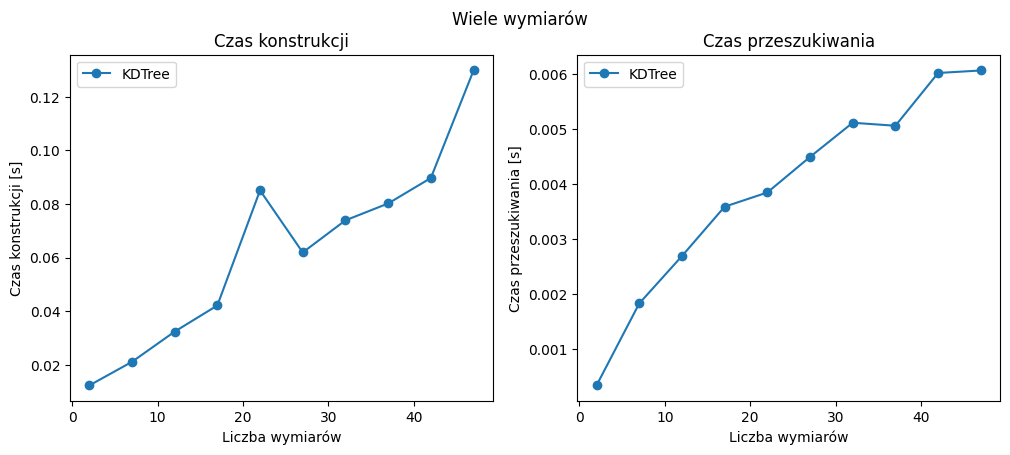

In [7]:
df9 = show_time_table_k([gt.generate_multidimensional_cluster(50,30,1000,n) for n in range(2,50,5)],output_file="c9.csv")
show_graphs_k(df9, "Wiele wymiarów")

Przeszukiwanie bez punktów w każdym wierzchołku kdTree (nie działa)

In [12]:
import copy
def show_time_table_b(test_set, rectangle=Rectangle(Point((30,30)), Point((70,70))), output_file=None, title="Benchmark"):
    """
    Wyświetla tabelę z czasami budowy i wyszukiwania dla KDTree (z różnymi ustawieniami),
    z opcją zapisu do pliku CSV.
    """
    search_times = []
    sizes = []

    for zbior_test in test_set:
        liczba_punktow = len(zbior_test)
        sizes.append(liczba_punktow)
        
        # Tworzenie niezależnych kopii danych wejściowych
        data_in = copy.deepcopy(zbior_test)
        data_without = copy.deepcopy(zbior_test)

        # Mierzenie czasu dla KDTree in
        kdtree_in, _ = measure_time(kd_tree.KdTree, data_in, len(data_in[0]), is_points_in_vertix=True)
        _, search_kd_time_in = measure_time(kdtree_in.find_points_in_region, rectangle)

        # Mierzenie czasu dla KDTree without
        kdtree_without, _ = measure_time(kd_tree.KdTree, data_without, len(data_without[0]), is_points_in_vertix=False)
        _, search_kd_time_without = measure_time(kdtree_without.find_points_in_region, rectangle)

        # Dodanie wyników
        search_times.append([search_kd_time_in, search_kd_time_without])

    # Tworzenie DataFrame
    df = pd.DataFrame(
        data={
            "Liczba punktów": sizes,
            "KDTree Search with points in vertix [s]": [st[0] for st in search_times],
            "KDTree Search without points in vertix [s]": [st[1] for st in search_times],
        }
    )

    # Wyświetlanie tytułu i tabeli
    print(f"\n{title}")
    print(df)

    # Zapis do pliku CSV, jeśli podano ścieżkę
    if output_file:
        df.to_csv(output_file, index=False)
        print(f"\nTabela została zapisana do pliku: {output_file}")
    return df
def show_graph_b(df, title):
    """
    Generuje pojedynczy wykres pokazujący czas konstrukcji dla różnych metod KDTree.
    
    Args:
        df (DataFrame): Dane do wykresu.
        title (str): Tytuł wykresu.
    """
    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))
    plt.title(title)

    # Dodanie danych do wykresu
    plt.plot(df["Liczba punktów"], df["KDTree Search with points in vertix [s]"], label="KDTree Search with points in vertix", marker="o")
    plt.plot(df["Liczba punktów"], df["KDTree Search without points in vertix [s]"], label="KDTree Search without points in vertix", marker="o")
    
    # Etykiety osi
    plt.xlabel("Liczba punktów")
    plt.ylabel("Czas konstrukcji [s]")
    
    # Legenda
    plt.legend()
    
    # Wyświetlenie wykresu
    plt.grid(True)
    plt.show()


Benchmark
   Liczba punktów  KDTree Search with points in vertix [s]  KDTree Search without points in vertix [s]
0           10000                                 0.002173                                    0.003543
1           20000                                 0.004002                                    0.007125
2           30000                                 0.005832                                    0.010556
3           40000                                 0.006687                                    0.014148
4           50000                                 0.009233                                    0.017432
5           60000                                 0.009375                                    0.020105
6           70000                                 0.010895                                    0.024743
7           80000                                 0.012805                                    0.026513
8           90000                                 0.013772    

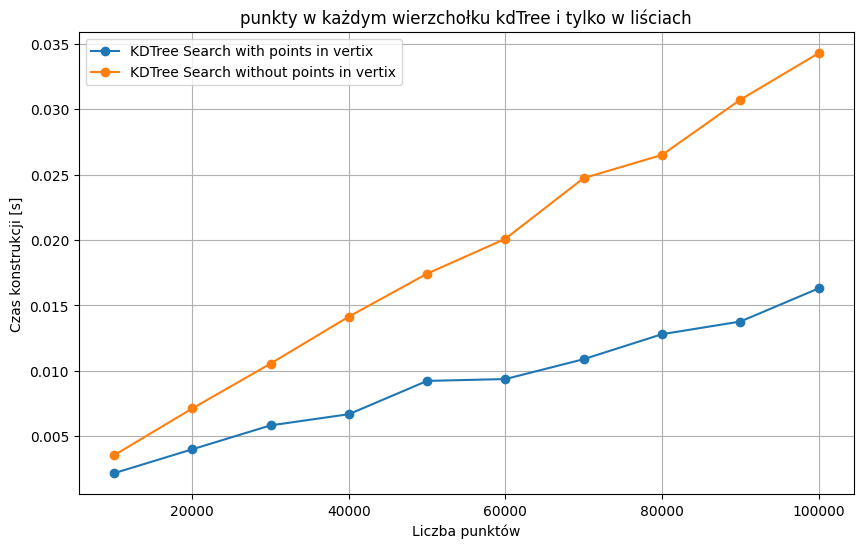

In [13]:
df10 = show_time_table_b([gt.generate_standard_distribution(10000*n,50,50,30,30) for n in range(1,11)],Rectangle(Point((10,10)),Point((60,100))),output_file="c10.csv")
show_graph_b(df10, "punkty w każdym wierzchołku kdTree i tylko w liściach")

## Wizualizacje tworzenia struktur

Rozkład jednostajny

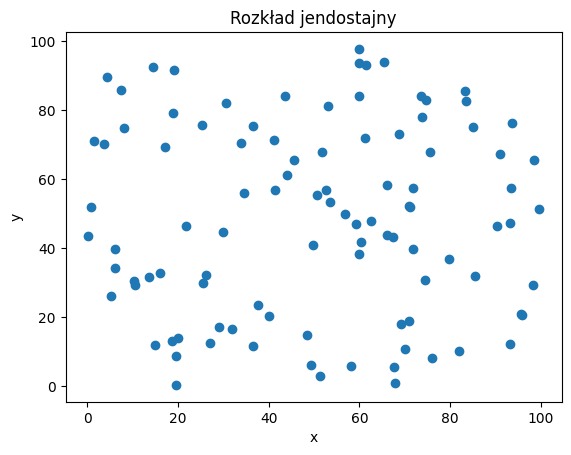

In [2]:
ud = gt.generate_uniform_distribution(100,0,100,0,100)
vis = Visualizer()
vis.add_title("Rozkład jendostajny")
vis.add_point(ud)
vis.show()

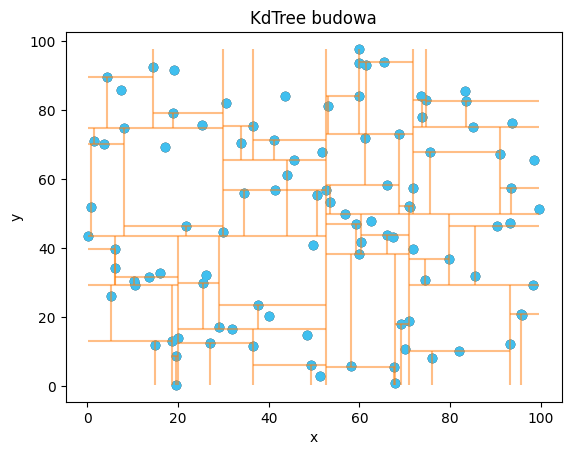

In [3]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
_=kdtree.give_visualization_of_create(ud,draw_final=True,name="KdTree budowa")

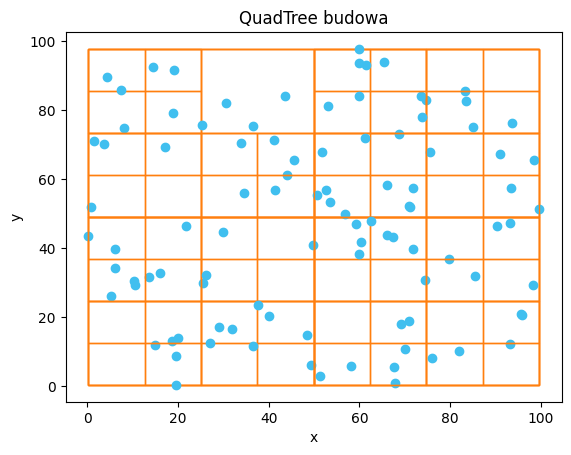

In [6]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
vis.add_title("QuadTree budowa")
vis.show()

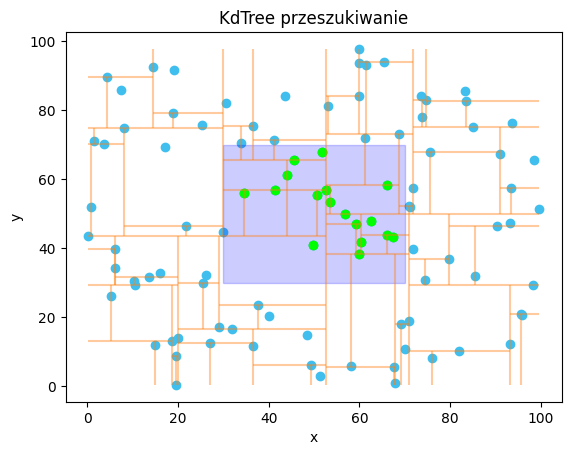

In [7]:
vis.clear()
_=kdtree.give_visualization_of_search(((30,30),(70,70)),draw_final=True,name="KdTree przeszukiwanie")



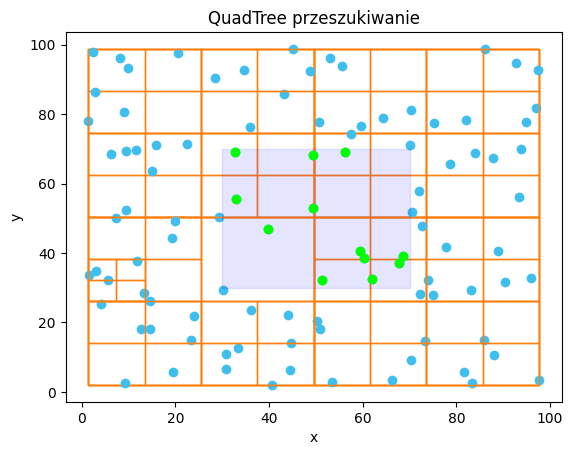

In [10]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((30,30)),Point((70,70)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree przeszukiwanie")
vis.show()


Rozkład normalny

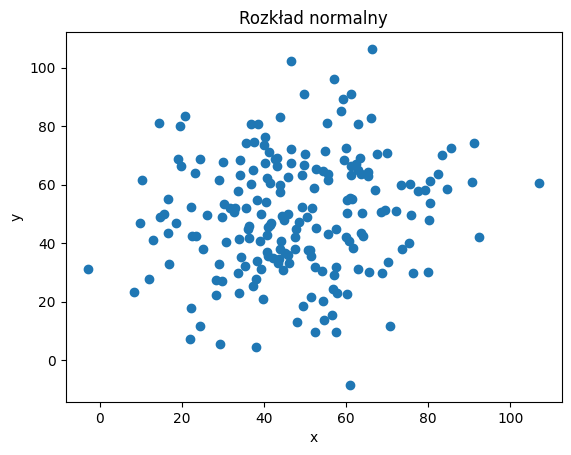

In [19]:
ud = gt.generate_standard_distribution(200,50,50,20,20)
vis = Visualizer()
vis.add_title("Rozkład normalny")
vis.add_point(ud)
vis.show()

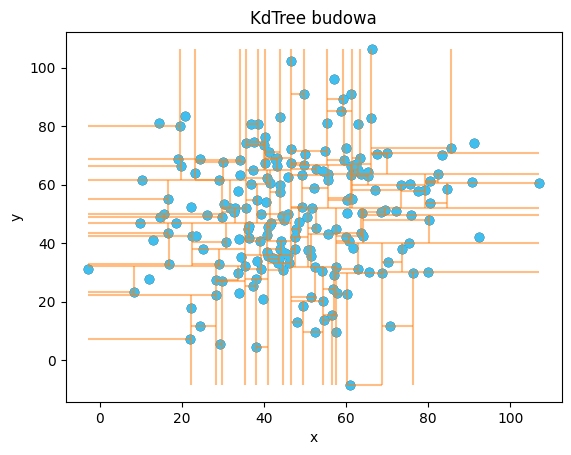

In [20]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
_=kdtree.give_visualization_of_create(ud,draw_final=True,name="KdTree budowa")

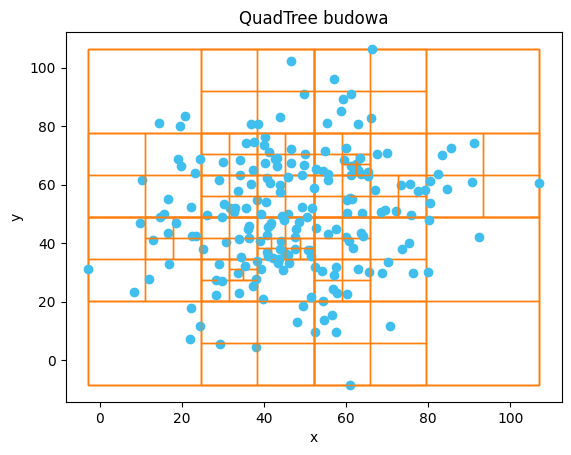

In [21]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
vis.add_title("QuadTree budowa")
vis.show()

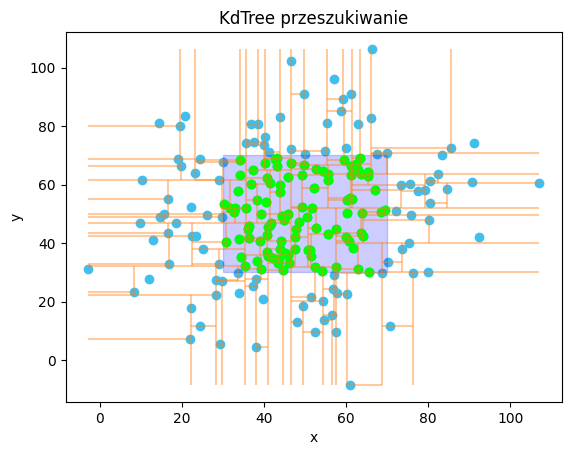

In [22]:
vis.clear()
_=kdtree.give_visualization_of_search(((30,30),(70,70)),draw_final=True,name="KdTree przeszukiwanie")


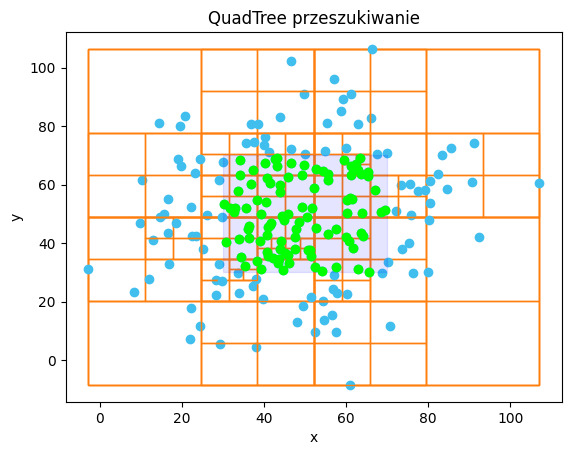

In [23]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((30,30)),Point((70,70)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree przeszukiwanie")
vis.show()


Dwa skupiska

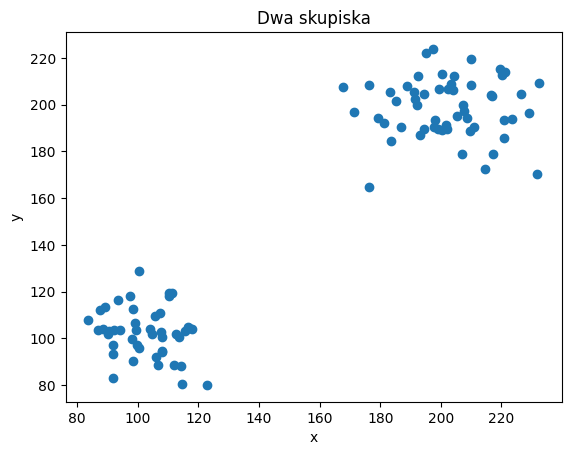

In [53]:
ud = gt.generate_clasters(100,2,0,100,0,100) 
vis = Visualizer()
vis.add_title("Dwa skupiska")
vis.add_point(ud)
vis.show()

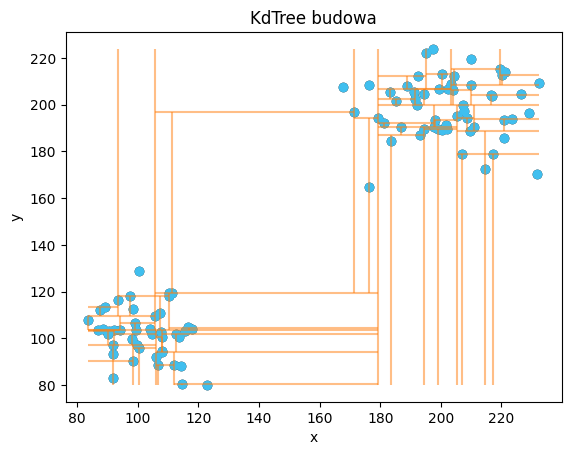

In [54]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
_=kdtree.give_visualization_of_create(ud,draw_final=True,name="KdTree budowa")

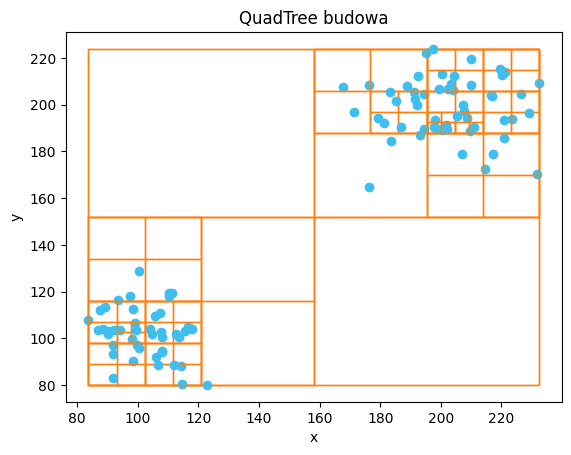

In [55]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
vis.add_title("QuadTree budowa")
vis.show()

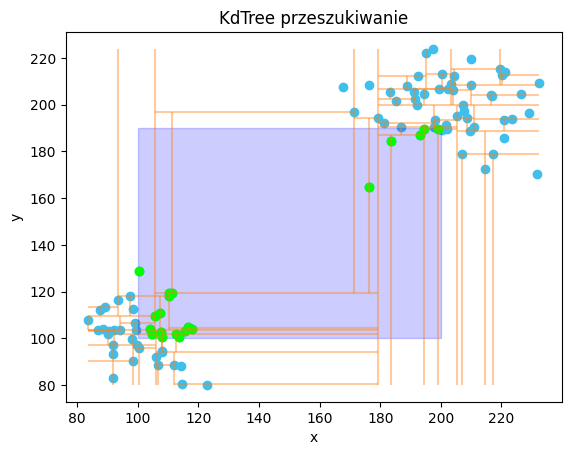

In [56]:
vis.clear()
_=kdtree.give_visualization_of_search(((100,100),(200,190)),draw_final=True,name="KdTree przeszukiwanie")

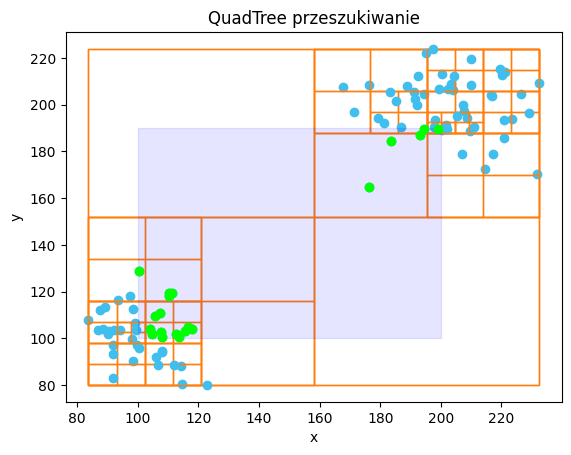

In [57]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((100,100)),Point((200,190)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree przeszukiwanie")
vis.show()


Trzy skupiska

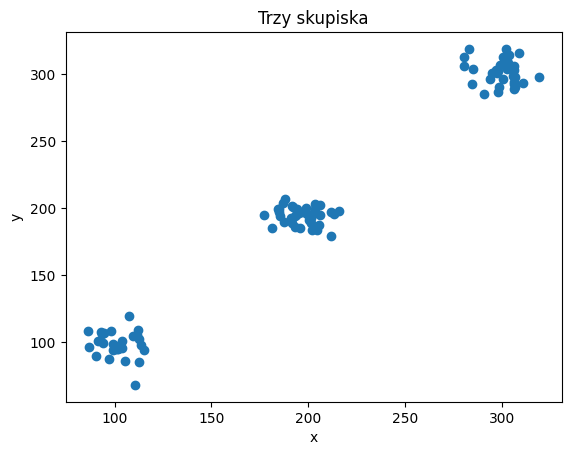

In [58]:
ud = gt.generate_clasters(100,3,0,100,0,100)
vis = Visualizer()
vis.add_title("Trzy skupiska")
vis.add_point(ud)
vis.show()

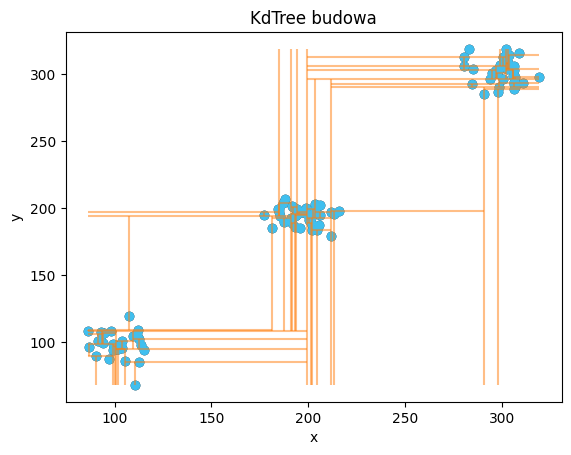

In [59]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
_=kdtree.give_visualization_of_create(ud,draw_final=True,name="KdTree budowa")

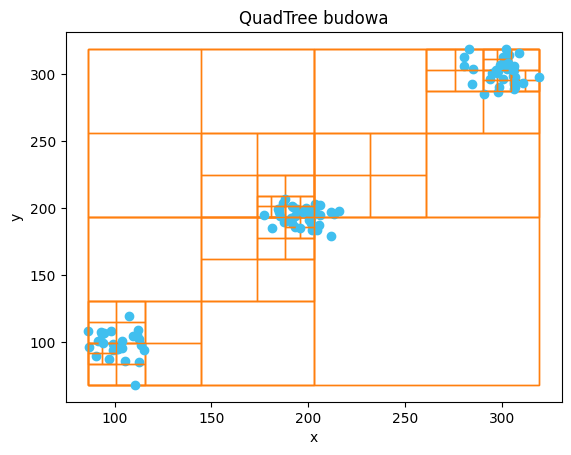

In [60]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
vis.add_title("QuadTree budowa")
vis.show()

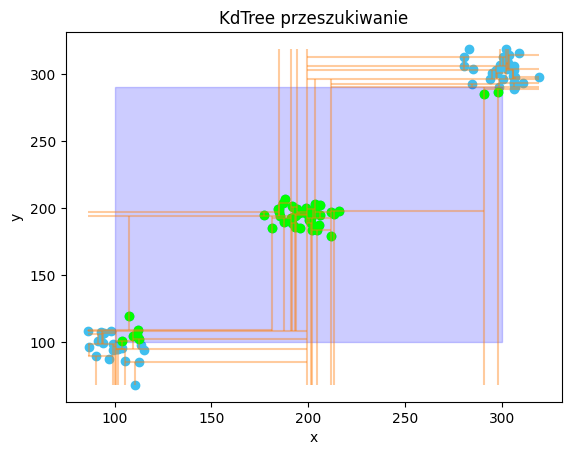

In [61]:
vis.clear()
_=kdtree.give_visualization_of_search(((100,100),(300,290)),draw_final=True,name="KdTree przeszukiwanie")

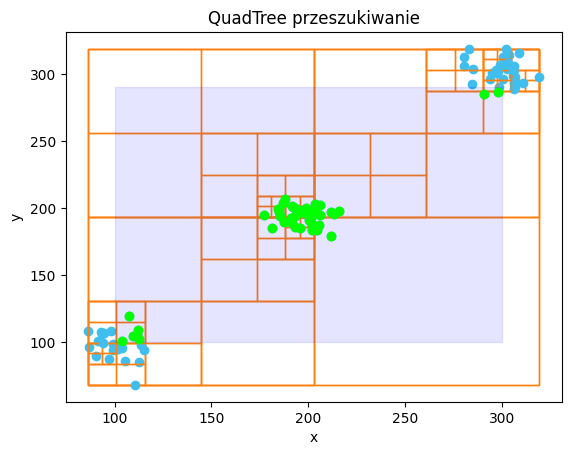

In [62]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((100,100)),Point((300,290)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree przeszukiwanie")
vis.show()


3.3 Dwa skupiska z wartościami odstającymi

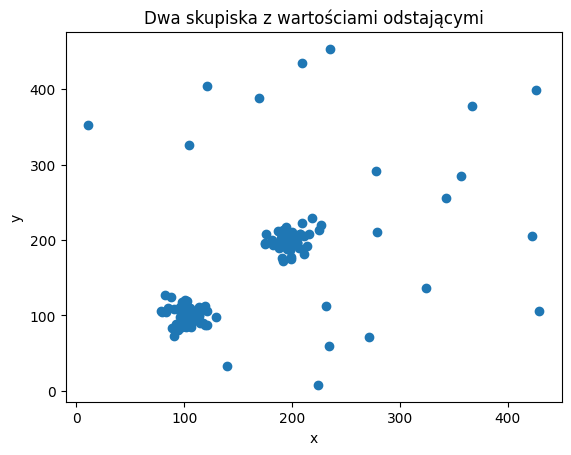

In [63]:
ud = gt.add_outliners(20, gt.generate_clasters(100,2,0,100,0,100),0,100,0,100)
vis = Visualizer()
vis.add_title("Dwa skupiska z wartościami odstającymi")
vis.add_point(ud)
vis.show()

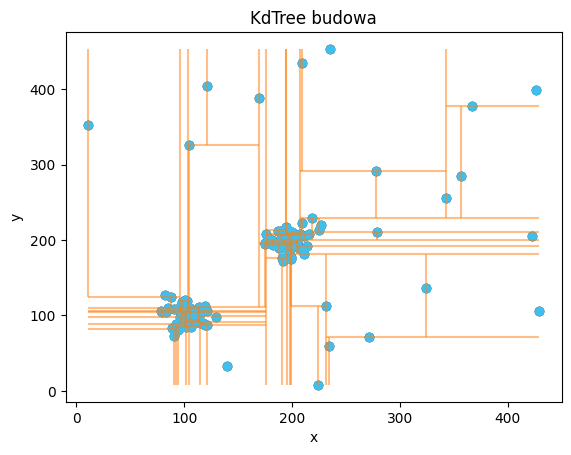

In [64]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
_=kdtree.give_visualization_of_create(ud,draw_final=True,name="KdTree budowa")

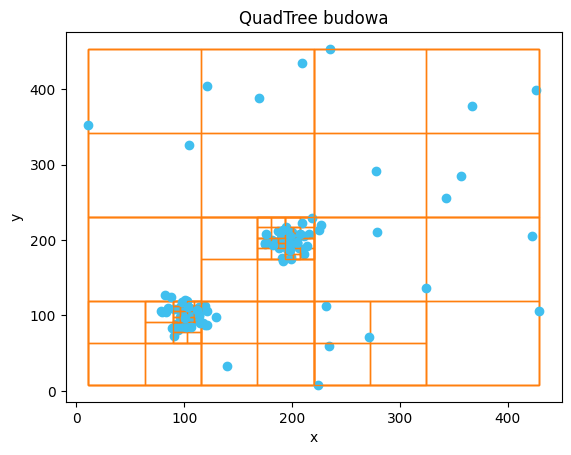

In [65]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
vis.add_title("QuadTree budowa")
vis.show()

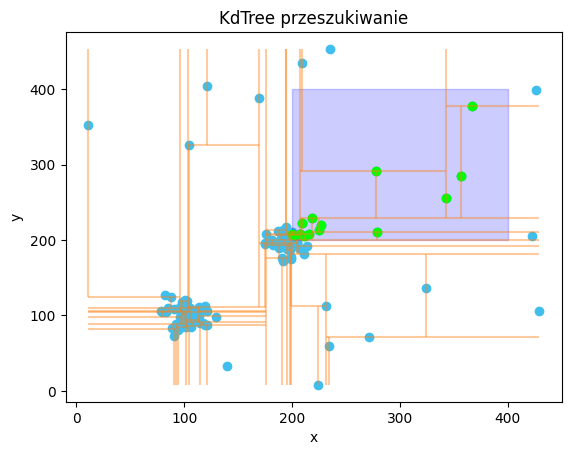

In [66]:
vis.clear()
_=kdtree.give_visualization_of_search(((200,200),(400,400)),draw_final=True,name="KdTree przeszukiwanie")



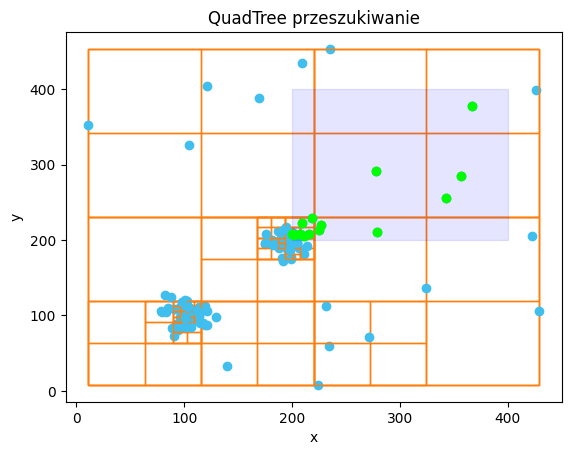

In [67]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((200,200)),Point((400,400)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree przeszukiwanie")
vis.show()


Rozkład w kształcie okręgu

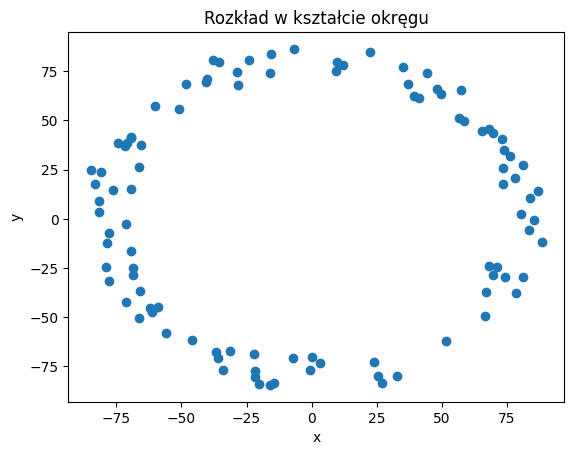

In [68]:
ud = gt.generate_random_on_circle(100,70,90)
vis = Visualizer()
vis.add_title("Rozkład w kształcie okręgu")
vis.add_point(ud)
vis.show()

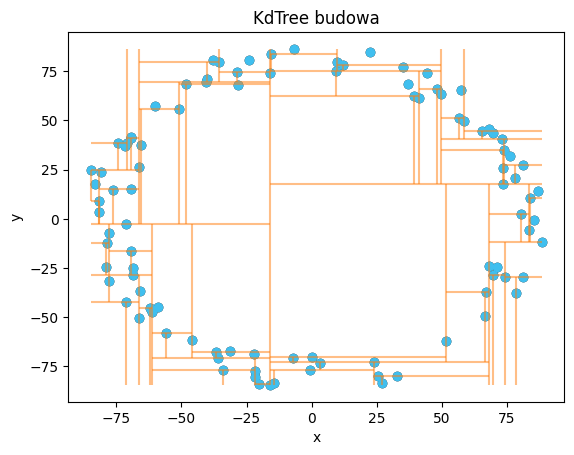

In [69]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
_=kdtree.give_visualization_of_create(ud,draw_final=True,name="KdTree budowa")

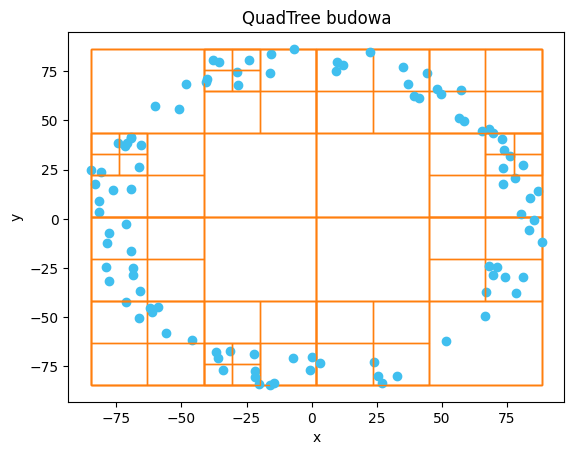

In [70]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
vis.add_title("QuadTree budowa")
vis.show()

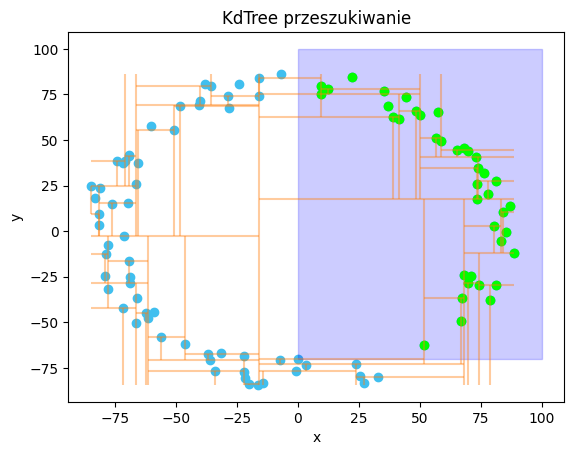

In [71]:
vis.clear()
_=kdtree.give_visualization_of_search(((0,-70),(100,100)),draw_final=True,name="KdTree przeszukiwanie")


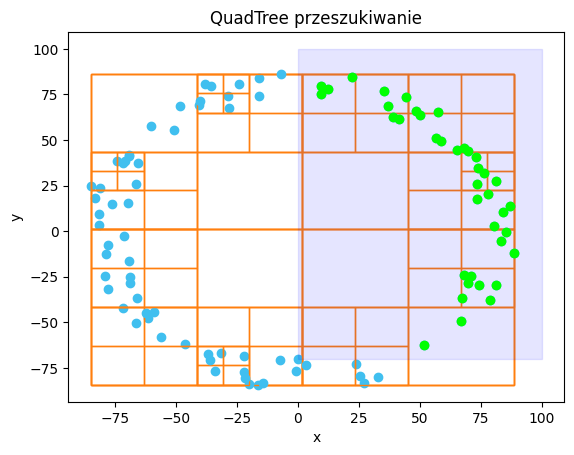

In [72]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((0,-70)),Point((100,100)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree przeszukiwanie")
vis.show()


Rozkład krzyżowy

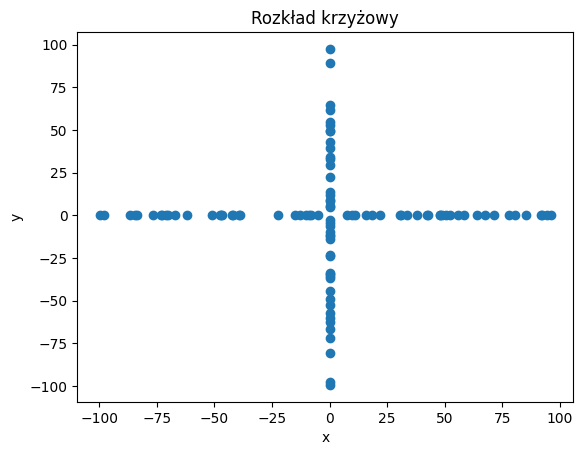

In [79]:
ud = gt.generate_cross_on_axes(100,-100,100,-100,100)
vis = Visualizer()
vis.add_title("Rozkład krzyżowy")
vis.add_point(ud)
vis.show()

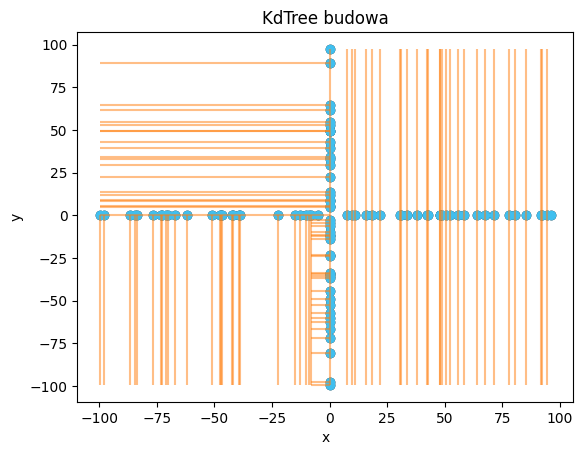

In [80]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
_=kdtree.give_visualization_of_create(ud,draw_final=True,name="KdTree budowa")

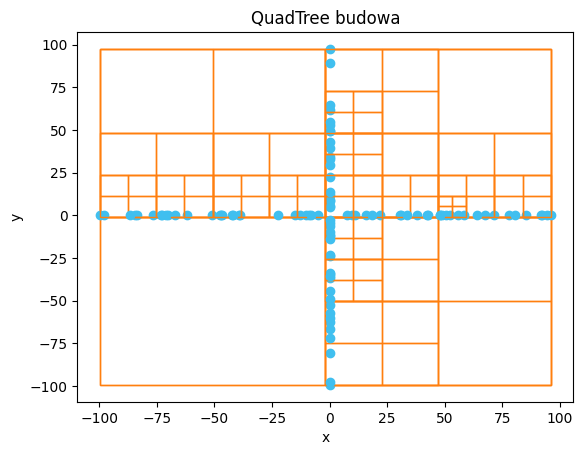

In [81]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
vis.add_title("QuadTree budowa")
vis.show()

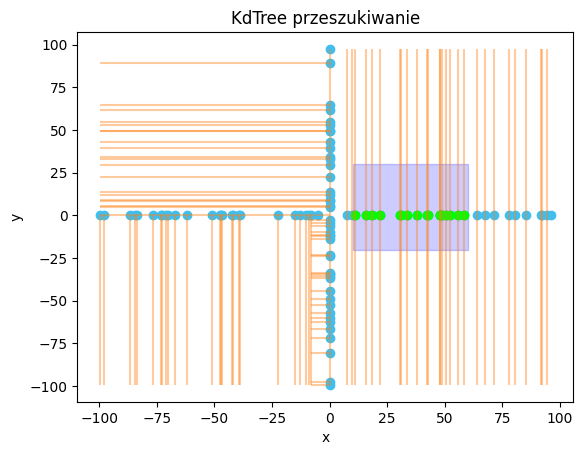

In [82]:
vis.clear()
_=kdtree.give_visualization_of_search(((10,-20),(60,30)),draw_final=True,name="KdTree przeszukiwanie")


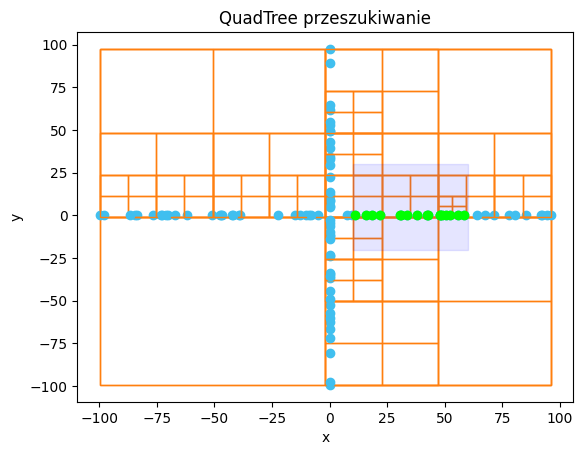

In [83]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((10,-20)),Point((60,30)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree przeszukiwanie")
vis.show()


Rozkład na obwodzie prostokąta

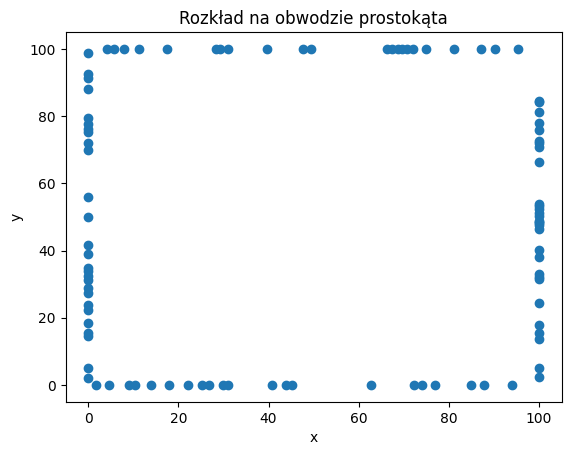

In [84]:
ud = gt.generate_random_points_on_rectangle(100,0,100,0,100)
vis = Visualizer()
vis.add_title("Rozkład na obwodzie prostokąta")
vis.add_point(ud)
vis.show()

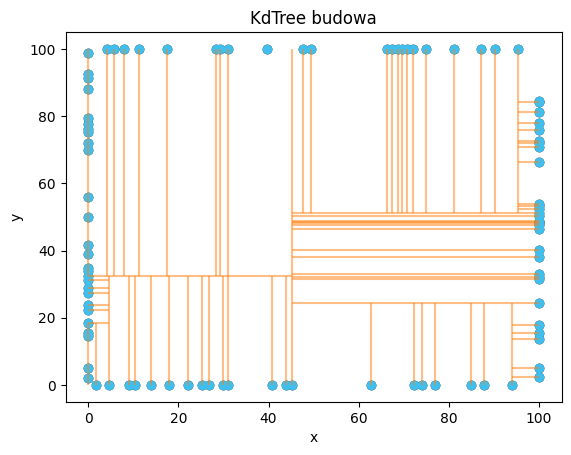

In [85]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
_=kdtree.give_visualization_of_create(ud,draw_final=True,name="KdTree budowa")

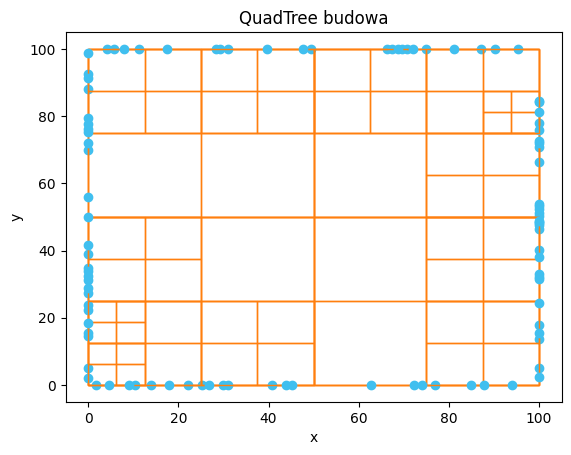

In [86]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
vis.add_title("QuadTree budowa")
vis.show()

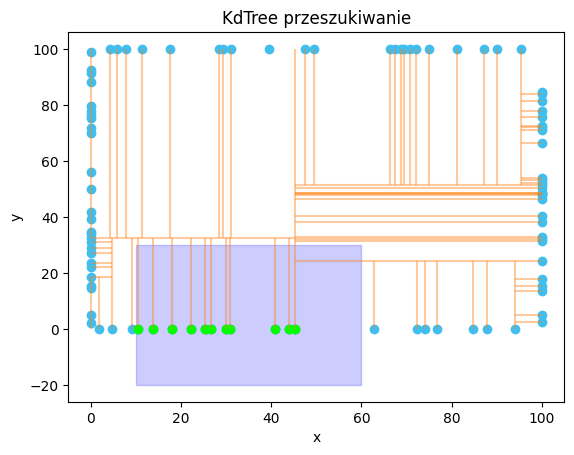

In [88]:
vis.clear()
_=kdtree.give_visualization_of_search(((10,-20),(60,30)),draw_final=True,name="KdTree przeszukiwanie")

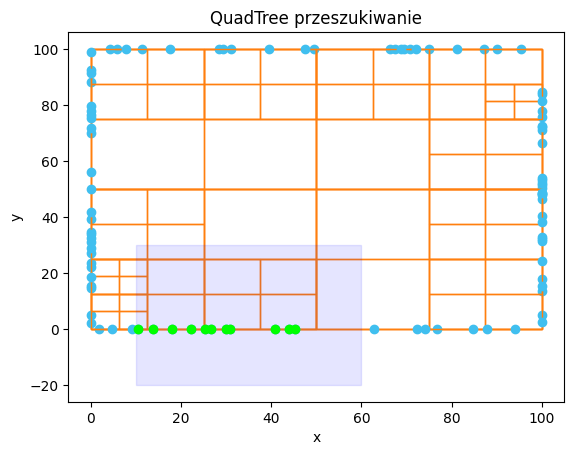

In [89]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((10,-20)),Point((60,30)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree przeszukiwanie")
vis.show()


Rozkład wzdłuż lini

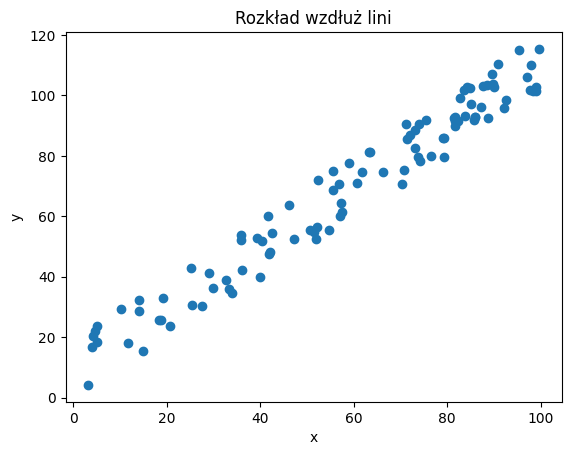

In [115]:
ud = gt.generate_random_on_line(100,1,10,0,100,10) 
vis = Visualizer()
vis.add_title("Rozkład wzdłuż lini")
vis.add_point(ud)
vis.show()

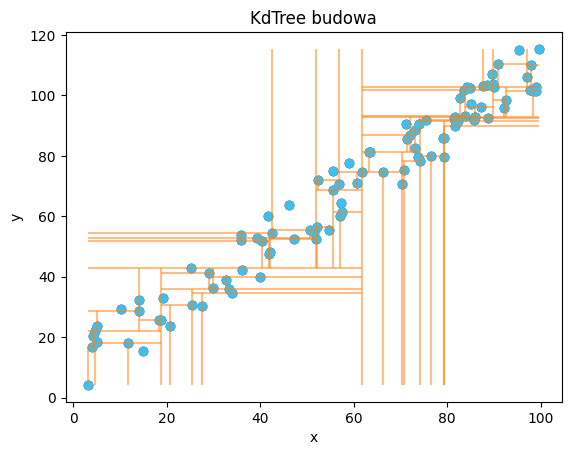

In [116]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
_=kdtree.give_visualization_of_create(ud,draw_final=True,name="KdTree budowa")

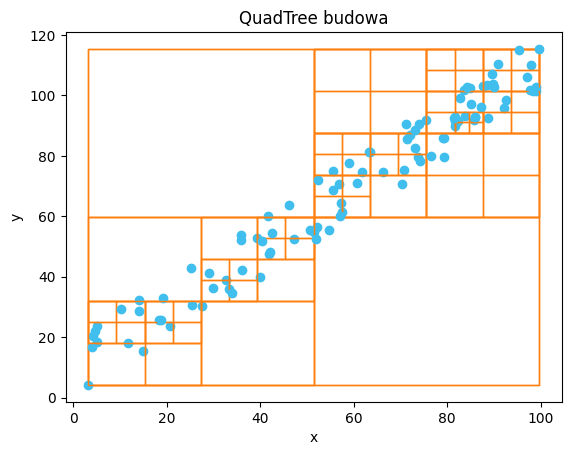

In [117]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
vis.add_title("QuadTree budowa")
vis.show()

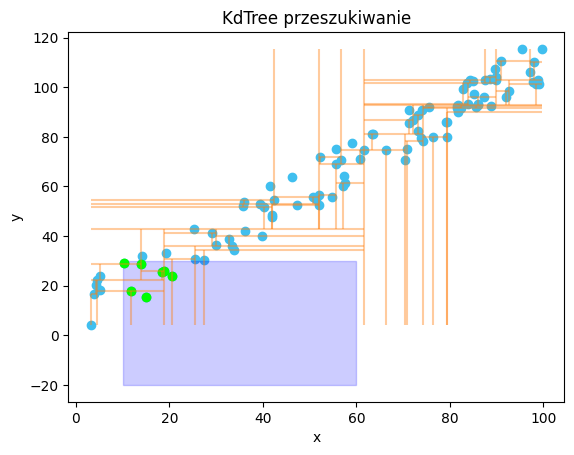

In [118]:
vis.clear()
_=kdtree.give_visualization_of_search(((10,-20),(60,30)),draw_final=True,name="KdTree przeszukiwanie")

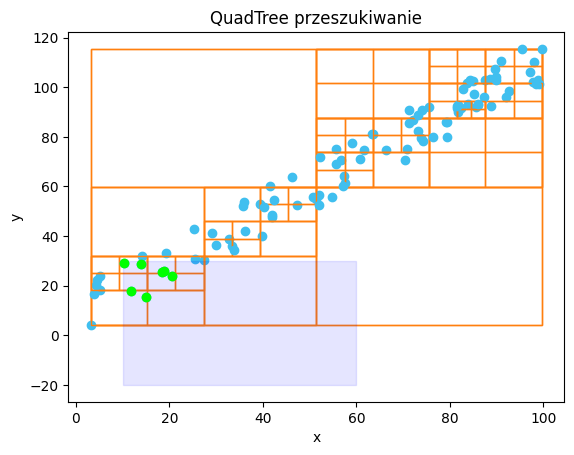

In [119]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((10,-20)),Point((60,30)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree przeszukiwanie")
vis.show()


Rozkład "Siatka"

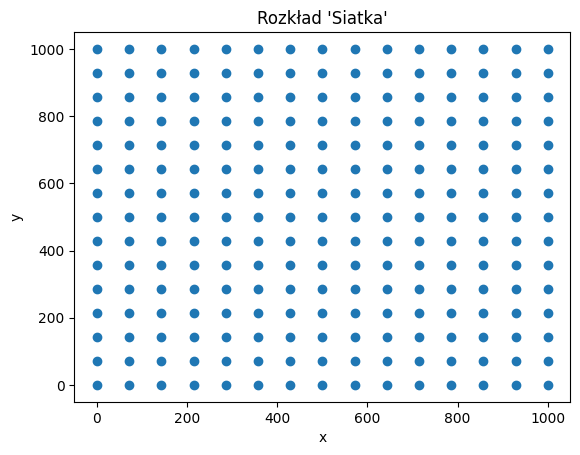

In [97]:
ud = gt.generate_grid_normal(15,0,1000,0,1000)
vis = Visualizer()
vis.add_title("Rozkład 'Siatka'")
vis.add_point(ud)
vis.show()

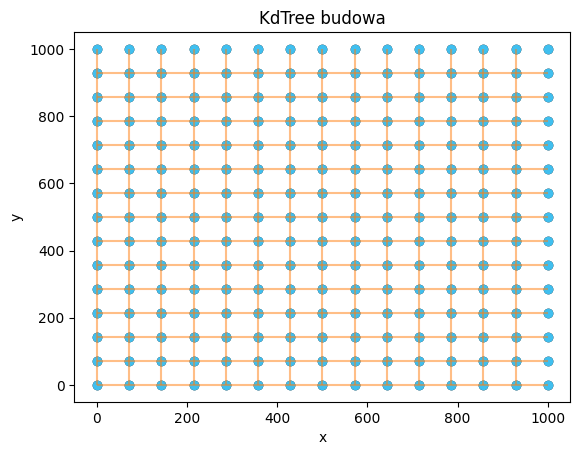

In [108]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
_=kdtree.give_visualization_of_create(ud,draw_final=True,name="KdTree budowa")

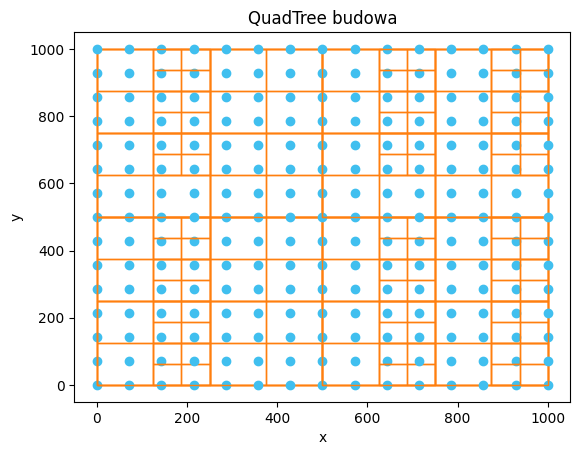

In [99]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
vis.add_title("QuadTree budowa")
vis.show()

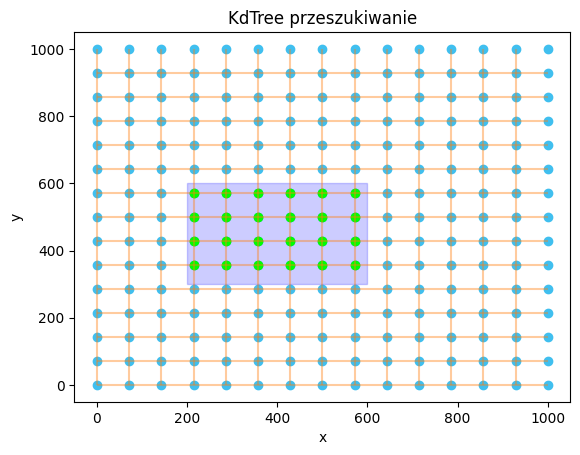

In [106]:
vis.clear()
_=kdtree.give_visualization_of_search(((200,300),(600,600)),draw_final=True,name="KdTree przeszukiwanie")


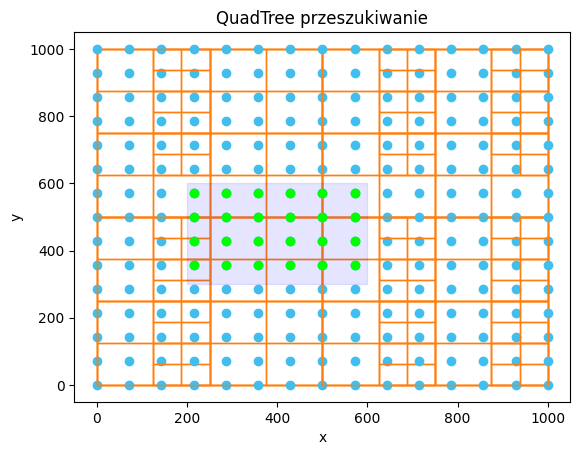

In [102]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((200,300)),Point((600,600)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree przeszukiwanie")
vis.show()


### Wizualizacja w postaci gifów

Jako przykładowy zbiór punktow posłuży rozkład jednostajny

In [134]:
ud = gt.generate_uniform_distribution(20,0,100,0,100)

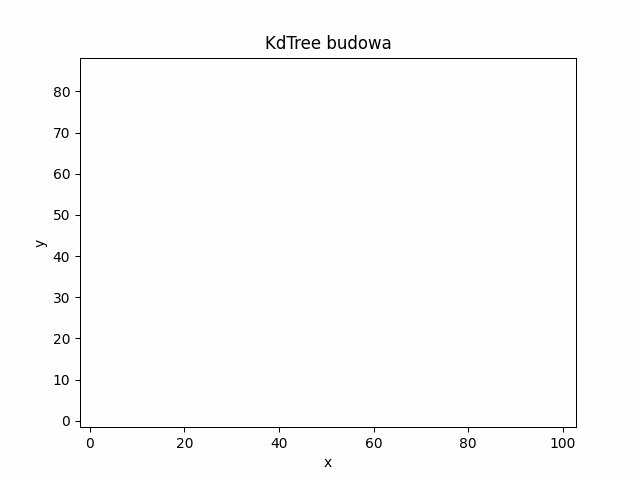

In [135]:
kdtree = kd_tree_visualiser.Visualization()
vis.clear()
vis=kdtree.give_visualization_of_create(ud)
vis.add_title("KdTree budowa")
vis.show_gif()

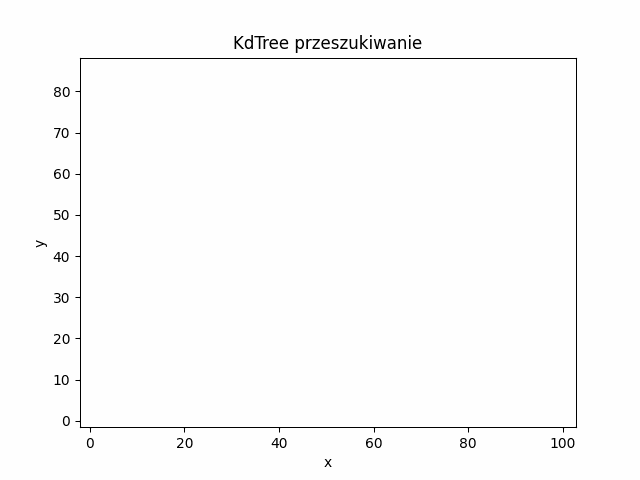

In [138]:
vis.clear()
vis=kdtree.give_visualization_of_search(((30,40),(70,80)))
vis.add_title("KdTree przeszukiwanie")
vis.show_gif(interval=400)


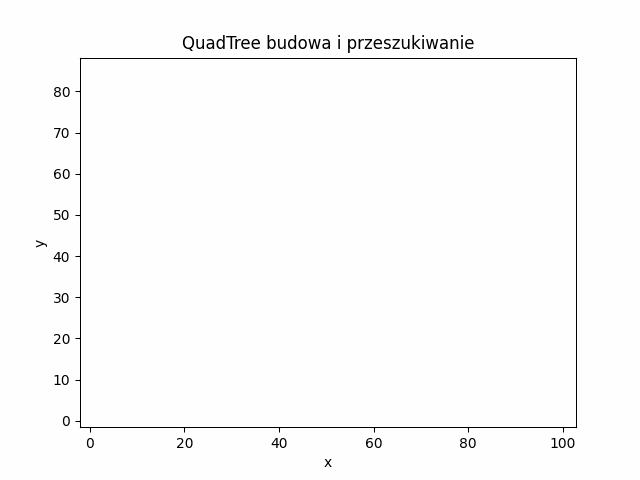

In [137]:
vis.clear()
quadtree = quad_tree_vis.build_quadtree(ud, max_points=3, visualizer=vis)
search_region = Rectangle(Point((30,40)),Point((70,80)))
found_points = quadtree.search(search_region, [])
vis.add_title("QuadTree budowa i przeszukiwanie")
vis.show_gif()